In [131]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import folium
import squarify
#dataset select
df1 = pd.read_csv('LCA_Disclosure_Data_FY2022_Q2.csv')
#df2 = pd.read_csv('PW_Disclosure_Data_FY2022_Q2_revised_form.csv', low_memory=False)
#df3 = pd.read_csv('PERM_Disclosure_Data_FY2022_Q2.csv', low_memory=False)

df1.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
#df2.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
#df3.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)


,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,APPENDIX_A_ATTACHED,PUBLIC_DISCLOSURE,PREPARER_LAST_NAME,PREPARER_FIRST_NAME,PREPARER_MIDDLE_INITIAL,PREPARER_BUSINESS_NAME,PREPARER_EMAIL
0,I-200-22090-026245,Withdrawn,2022-03-31,2022-03-31,NaN,H-1B,Trade Marketing Manager,11-2021.00,Marketing Managers,Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
1,I-200-22090-025516,Withdrawn,2022-03-31,2022-03-31,NaN,H-1B,Supply Chain Analyst,13-1081.00,Logisticians,Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
2,I-200-22090-024846,Withdrawn,2022-03-31,2022-03-31,NaN,H-1B,Staff Engineer,15-1132.00,"Software Developers, Applications",Y,...,No,NaN,NaN,NaN,Disclose Business,Williams,Alexis,M.,"Fragomen, Del Rey, Bernsen & Loewy, LLP",awilliams@fragomen.com
3,I-200-22090-024064,Withdrawn,2022-03-31,2022-03-31,NaN,H-1B,"Software Developers, Applications - KBGFJG1165...",15-1132.00,"Software Developers, Applications",Y,...,No,NaN,NaN,NaN,Disclose Business,CONFORTI,JOSEPH,B,EY LAW LLP,niveyus@ca.ey.com
4,I-200-22090-025039,Withdrawn,2022-03-31,2022-03-31,NaN,H-1B,Technical Team Lead,15-1121.00,Computer Systems Analysts,Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275652,I-200-19275-067945,Certified - Withdrawn,2019-10-02,2021-12-09,2019-10-09,H-1B,Scientist 2,15-2021.00,Mathematicians,Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
275653,I-200-19275-068298,Certified - Withdrawn,2019-10-02,2022-02-09,2019-10-09,H-1B,Residential Life Coordinator,21-1012.00,"Educational, Guidance, School, and Vocational ...",Y,...,No,NaN,NaN,NaN,Disclose Business,Silzer,Scot,A,SilzerLaw Chartered,slc@silzerlaw.com
275654,I-200-19275-068520,Certified - Withdrawn,2019-10-02,2022-02-18,2019-10-09,H-1B,ASSISTANT PROJECT SCIENTIST,19-1022.00,Microbiologists,Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
275655,I-200-19275-067882,Certified - Withdrawn,2019-10-02,2022-03-08,2019-10-09,H-1B,Senior Integration Engineer,15-1132.00,"Software Developers, Applications",Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN


In [132]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)
pd.describe_option()

compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
compute.use_numba : bool
    Use the numba engine option for select operations if it is installed,
    the default is False
    Valid values: False,True
    [default: False] [currently: False]
compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
display.chop_threshold : float or None
    if set to a float value, all float values smaller then the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]
display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]
display.column_space No description available.
    [defa

1. dataset shpae

In [3]:
df1.shape

(275657, 96)

In [4]:
df2.shape

NameError: name 'df2' is not defined

In [ ]:
df3.shape

1. dataset column select

In [133]:
df_main = df1
print(df_main.columns)
print(len(df_main.columns))

Index(['CASE_NUMBER', 'CASE_STATUS', 'RECEIVED_DATE', 'DECISION_DATE',
       'ORIGINAL_CERT_DATE', 'VISA_CLASS', 'JOB_TITLE', 'SOC_CODE',
       'SOC_TITLE', 'FULL_TIME_POSITION', 'BEGIN_DATE', 'END_DATE',
       'TOTAL_WORKER_POSITIONS', 'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT',
       'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT',
       'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'EMPLOYER_NAME',
       'TRADE_NAME_DBA', 'EMPLOYER_ADDRESS1', 'EMPLOYER_ADDRESS2',
       'EMPLOYER_CITY', 'EMPLOYER_STATE', 'EMPLOYER_POSTAL_CODE',
       'EMPLOYER_COUNTRY', 'EMPLOYER_PROVINCE', 'EMPLOYER_PHONE',
       'EMPLOYER_PHONE_EXT', 'NAICS_CODE', 'EMPLOYER_POC_LAST_NAME',
       'EMPLOYER_POC_FIRST_NAME', 'EMPLOYER_POC_MIDDLE_NAME',
       'EMPLOYER_POC_JOB_TITLE', 'EMPLOYER_POC_ADDRESS_1',
       'EMPLOYER_POC_ADDRESS_2', 'EMPLOYER_POC_CITY', 'EMPLOYER_POC_STATE',
       'EMPLOYER_POC_POSTAL_CODE', 'EMPLOYER_POC_COUNTRY',
       'EMPLOYER_POC_PROVINCE', 'EMPLOYER_POC_PHONE', 'EMPLOYER_P

In [52]:
columns = ['WORKSITE_STATE', "PREVAILING_WAGE", 'WAGE_UNIT_OF_PAY', "VISA_CLASS",'SOC_TITLE', 'EMPLOYER_NAME']

#columns =["PREVAILING_WAGE","VISA_CLASS", "SOC_TITLE", "WORKSITE_STATE", "PW_WAGE_LEVEL"]

In [53]:

df_main = df_main[columns]
df_main["PREVAILING_WAGE"] = df_main["PREVAILING_WAGE"].str.replace(pat=r'$', repl=r'', regex=True)
df_main["PREVAILING_WAGE"] = df_main["PREVAILING_WAGE"].str.replace(pat=r',', repl=r'', regex=True)
df_main['PREVAILING_WAGE'] = pd.to_numeric(df_main['PREVAILING_WAGE'])
df_main =df_main.dropna(axis = 0)
df_main =df_main.dropna(axis = 1)

print(df_main.shape)

#exceptional case
df_main = df_main.loc[df_main["PREVAILING_WAGE"] > 500 ]

<ipython-input-53-b20865dbd3e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main["PREVAILING_WAGE"] = df_main["PREVAILING_WAGE"].str.replace(pat=r'$', repl=r'', regex=True)
<ipython-input-53-b20865dbd3e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main["PREVAILING_WAGE"] = df_main["PREVAILING_WAGE"].str.replace(pat=r',', repl=r'', regex=True)
<ipython-input-53-b20865dbd3e3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

(275657, 6)


In [54]:
df_main.describe(include='all')

,WORKSITE_STATE,PREVAILING_WAGE,WAGE_UNIT_OF_PAY,VISA_CLASS,SOC_TITLE,EMPLOYER_NAME
count,262480,262480.000000,262480,262480,262480,262480
unique,55,NaN,5,4,681,34001
top,CA,NaN,Year,H-1B,"Software Developers, Applications",Google LLC
freq,57571,NaN,262048,255402,83190,8131
mean,NaN,102704.352457,NaN,NaN,NaN,NaN
std,NaN,34020.584621,NaN,NaN,NaN,NaN
min,NaN,580.000000,NaN,NaN,NaN,NaN
25%,NaN,78915.000000,NaN,NaN,NaN,NaN
50%,NaN,98259.000000,NaN,NaN,NaN,NaN
75%,NaN,121763.000000,NaN,NaN,NaN,NaN


In [55]:
df_main = df_main.loc[df_main["WAGE_UNIT_OF_PAY"] == "Year"]

In [10]:
df_main["CASE_STATUS"].keys()

KeyError: 'CASE_STATUS'

666

In [40]:
df_new = pd.DataFrame(data = df_year['WORKSITE_STATE'].value_counts())
df_new['count'] = df_new['WORKSITE_STATE']
df_new['WORKSITE_STATE'] = df_new.index
df_new = df_new.reset_index()
del df_new['index']
df_new

,WORKSITE_STATE,count
0,CA,57491
1,TX,31876
2,NY,20227
3,WA,18485
4,IL,13045
5,NJ,12444
6,MA,10377
7,GA,9331
8,NC,8775
9,PA,7441


In [27]:
#mean PW of state
df_year.describe(include='all')
df_year['WORKSITE_STATE'].unique()
l_city = []
l_count = []
for city in df_year['WORKSITE_STATE'].unique():
    df_temp = df_main.loc[df_main['WORKSITE_STATE'] == city]
    l_count.append(df_temp.mean()[0])

df_new = pd.DataFrame(zip(df_year['WORKSITE_STATE'].unique(), l_count), columns = ['STATE', 'PW_Mean'])
df_new = df_new.sort_values('PW_Mean', ascending = 0)
df_new = df_new.reset_index()
del df_new['index']
df_new

,STATE,PW_Mean
0,CA,127012.765163
1,ME,116592.658385
2,WA,115601.091478
3,AK,112870.717179
4,NY,105602.436239
5,NJ,103793.284210
6,DC,98412.114936
7,OR,98221.009344
8,CO,97744.628335
9,VA,97668.231576


In [45]:
m = folium.Map([40, -102], zoom_start=4)
folium.Choropleth(
    geo_data='us-states.json', # 경계선 좌표값이 담긴 데이터
    data=df_new, # Series or DataFrame 넣으면 된다
    columns=['WORKSITE_STATE', 'count'], # DataFrame의 어떤 columns을 넣을지
    key_on='feature.id', # id 값을 가져오겠다; feature.id : feature 붙여줘야 함 (folium의 정해진 형식)
    fill_color='BuPu',
    fill_opacity=0.5, # 색 투명도
    line_opacity=0.5, # 선 투명도
    legend_name='Worker(persons)' # 범례
).add_to(m)
m

In [28]:
df_main[['WORKSITE_STATE', 'PREVAILING_WAGE']].describe(include='all')

,WORKSITE_STATE,PREVAILING_WAGE
count,262480,262480.000000
unique,55,NaN
top,CA,NaN
freq,57571,NaN
mean,NaN,102704.352457
std,NaN,34020.584621
min,NaN,580.000000
25%,NaN,78915.000000
50%,NaN,98259.000000
75%,NaN,121763.000000


In [95]:
df_ca = df_main.loc[df_main["WORKSITE_STATE"] == "CA" ]
df_tx = df_main.loc[df_main["WORKSITE_STATE"] == "TX" ]
df_ny = df_main.loc[df_main["WORKSITE_STATE"] == "NY" ]
df_wa = df_main.loc[df_main["WORKSITE_STATE"] == "WA" ]
df_fl = df_main.loc[df_main["WORKSITE_STATE"] == "FL" ]
df_me = df_main.loc[df_main["WORKSITE_STATE"] == "ME" ]


In [53]:
import seaborn as sns
  
df = df main   # tips 데이터 불러오기
df_pivot = df.pivot_table(index = 'day', values = 'size', aggfunc = 'sum') # 피벗테이블 만들기
df_pivot = df_pivot..sort_values(by='size', ascending = False)  # 값 정렬하기

SyntaxError: invalid syntax (<ipython-input-53-4ec0907e1347>, line 3)

In [68]:
soc_list = df_main["SOC_TITLE"]
soc_set = set(soc_list)
len(soc_set)

remove_title = []
for title in soc_set:
    if df_main.loc[df_main["SOC_TITLE"] == title].count()[1] < 10:
        remove_title.append(title)
        
for title in remove_title:
    df_main = df_main.loc[df_main["SOC_TITLE"] != title]

    

In [46]:
len(remove_title)

626

In [69]:
df_main.describe(include="all")

,WORKSITE_STATE,PREVAILING_WAGE,WAGE_UNIT_OF_PAY,VISA_CLASS,SOC_TITLE,EMPLOYER_NAME
count,261196,261196.000000,261196,261196,261196,261196
unique,55,NaN,1,4,329,33550
top,CA,NaN,Year,H-1B,"Software Developers, Applications",Google LLC
freq,57355,NaN,261196,254325,83155,8131
mean,NaN,102909.462792,NaN,NaN,NaN,NaN
std,NaN,33821.566170,NaN,NaN,NaN,NaN
min,NaN,1994.400000,NaN,NaN,NaN,NaN
25%,NaN,78915.000000,NaN,NaN,NaN,NaN
50%,NaN,98426.000000,NaN,NaN,NaN,NaN
75%,NaN,121763.000000,NaN,NaN,NaN,NaN


LCA VISA 

In [265]:
df_e3 = df_main.loc[df["VISA_CLASS"] == "E-3 Australian"]
df_h = df_main.loc[df["VISA_CLASS"] == "H-1B"]
df_hc = df_main.loc[df["VISA_CLASS"] == "H-1B1 Chile"]
df_hs = df_main.loc[df["VISA_CLASS"] == "H-1B1 Singapore"]

In [277]:
df_main["PW_WAGE_LEVEL"].describe(include='all')

count     249345
unique         4
top           II
freq      104753
Name: PW_WAGE_LEVEL, dtype: object

LCA SOC_TITLE

In [190]:
df_Agri = df_main.loc[df_main["SOC_TITLE"] == 'Agricultural Inspectors']

In [191]:
df_Fina = df_main.loc[df_main["SOC_TITLE"] == "Financial Analysts" ]

In [204]:
df_Appl = df_main.loc[df_main["SOC_TITLE"] == "Software Developers, Applications" ]

In [264]:
df_syst = df_main.loc[df_main["SOC_TITLE"] == "Software Developers, Systems Software" ]

In [266]:
df_cai = df_main.loc[df_main["SOC_TITLE"] == "Computer and Information Systems Managers" ]

In [216]:
df_Appl.describe()

,PREVAILING_WAGE
count,83190.000000
mean,110168.568258
std,25362.376844
min,6659.450000
25%,91874.000000
50%,105040.000000
75%,125445.000000
max,217004.000000


LCA PREVAILING_WAGE

In [280]:
df_pw1 = df_main.loc[df_main["PW_WAGE_LEVEL"] == 'I']
df_pw2 = df_main.loc[df_main["PW_WAGE_LEVEL"] == 'II']
df_pw3 = df_main.loc[df_main["PW_WAGE_LEVEL"] == 'III']
df_pw4 = df_main.loc[df_main["PW_WAGE_LEVEL"] == 'IV']
#df_pw1 = df_main.loc[df["PW_WAGE_LEVEL"] == "I" ]
#df_pw2 = df_main.loc[df["PW_WAGE_LEVEL"] == "II"]
#df_pw3 = df_main.loc[df["PW_WAGE_LEVEL"] == "III"]
#df_pw4 = df_main.loc[df["PW_WAGE_LEVEL"] == "IV"]


In [237]:
df_pw1 = df_main.loc[df_main["PREVAILING_WAGE"] <= 78915 ]
df_pw2 = df_main.loc[(df_main["PREVAILING_WAGE"] >= 78915) & (df_main["PREVAILING_WAGE"] <= 121763)]
df_pw3 = df_main.loc[df_main["PREVAILING_WAGE"] > 121763 ]
df_sp = df_main.loc[df_main["PREVAILING_WAGE"] > 200000 ]



In [52]:
df_pw1.describe()

,PREVAILING_WAGE
count,43482.000000
mean,68462.877207
std,9893.833179
min,762.800000
25%,63794.000000
50%,70803.000000
75%,76066.000000
max,78915.000000


In [162]:
df_CA = df_main.loc[df["WORKSITE_STATE"] == "CA" ]
df_TX = df_main.loc[df["WORKSITE_STATE"] == "TX" ]
df_NY = df_main.loc[df["WORKSITE_STATE"] == "NY" ]
df_WA = df_main.loc[df["WORKSITE_STATE"] == "WA" ]
df_FL = df_main.loc[df["WORKSITE_STATE"] == "FL" ]


In [30]:
df_ca.describe(include='all')

,WORKSITE_STATE,PREVAILING_WAGE,WAGE_UNIT_OF_PAY,VISA_CLASS
count,57571,57571.000000,57571,57571
unique,1,NaN,5,4
top,CA,NaN,Year,H-1B
freq,57571,NaN,57491,55718
mean,NaN,127012.765163,NaN,NaN
std,NaN,35884.178832,NaN,NaN
min,NaN,1570.400000,NaN,NaN
25%,NaN,101192.000000,NaN,NaN
50%,NaN,126838.000000,NaN,NaN
75%,NaN,149915.500000,NaN,NaN


In [9]:
df_index=df
df_index.index


Int64Index([270823, 265421, 265420, 152010, 132540, 187987, 189313, 162856,
             16045,  89188,
            ...
            241526,  67460, 173468, 240948, 100208,  55078,    193, 150373,
            222955, 254390],
           dtype='int64', length=13177)

In [7]:
df= df.sort_values(by='PREVAILING_WAGE', ascending=False)

NameError: name 'df_index' is not defined

In [184]:
df_FL.describe()

,PREVAILING_WAGE
count,7389.000000
mean,86554.976106
std,29072.323238
min,709.200000
25%,70158.000000
50%,81744.000000
75%,101130.000000
max,300000.000000


In [34]:
df_me.describe(include='all')

,WORKSITE_STATE,PREVAILING_WAGE,WAGE_UNIT_OF_PAY,VISA_CLASS
count,161,161.000000,161,161
unique,1,NaN,1,2
top,ME,NaN,Year,H-1B
freq,161,NaN,161,160
mean,NaN,116592.658385,NaN,NaN
std,NaN,61854.332513,NaN,NaN
min,NaN,26570.000000,NaN,NaN
25%,NaN,71136.000000,NaN,NaN
50%,NaN,93350.000000,NaN,NaN
75%,NaN,208000.000000,NaN,NaN


In [10]:
df.isnull()

,PUBLIC_DISCLOSURE
0,False
1,False
2,False
3,False
4,False
...,...
275652,False
275653,False
275654,False
275655,False


In [70]:
df.mode(axis = 0)

NameError: name 'df' is not defined

In [76]:
soc_list = df_tx["EMPLOYER_NAME"]
soc_set = set(soc_list)
len(soc_set)

remove_title = []
for title in soc_set:
    if df_tx.loc[df_tx["EMPLOYER_NAME"] == title].count()[1] < 3:
        remove_title.append(title)
        
remove_title

['Regis Corporation',
 'Qolo Inc.',
 'XPO Logistics Supply Chain Corporate Services, Inc.',
 'AGILEITSERVICE, LLC.',
 'Geon Performance Solutions, LLC',
 'GLOBALPOINT, INC.',
 'Novi Financial, Inc.',
 'Happy Lungs Project, Inc. ',
 'Xactly Corporation (20631.100)',
 'Turing Enterprises Inc. ',
 'Z3 TECHNOLOGIES INC.',
 'Data Theorem, Inc',
 'Ally Financial, Inc.',
 'Vedainfo, Inc.',
 'BUFFBUNNY COLLECTION LLC',
 'Empyrean Benefit Solutions, Inc.',
 'TRUENET COMMUNICATIONS, CORP.',
 'Gexa Energy, LP',
 'NESTOR TECHNOLOGIES, INC.',
 'SSRX, LLC',
 'BIGDATA SOLUTIONS INC',
 'Mitchell/Martin, Inc.',
 'Inossem Inc. ',
 'IT & EBusiness Consulting Services, Inc.',
 'M3 GLOBAL INC',
 'Financial Industry Regulatory Authority, Inc. ',
 'Convo Communications, LLC',
 'Braemar Technical Services, Inc.',
 'Wangs Alliance Corporation',
 'Camunda Inc.',
 'The A21 Campaign',
 'Kyriba Corp.',
 'Nacogdoches Independent School District',
 'Aspenstate, Inc.',
 'Bank of the West',
 'ITEK Software, LLC',
 'Na

In [77]:
for title in remove_title:
    df_tx = df_tx.loc[df_main["EMPLOYER_NAME"] != title]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [127]:
df_tx1 = pd.DataFrame(df_tx['EMPLOYER_NAME'].value_counts())
df_tx1 = df_tx1.loc[df_tx1['EMPLOYER_NAME'] > 200]
df_tx1

,EMPLOYER_NAME
Ernst & Young U.S. LLP,776
COGNIZANT TECHNOLOGY SOLUTIONS US CORP,679
Amazon.com Services LLC,676
Tata Consultancy Services Limited,543
INFOSYS LIMITED,541
"Amazon Web Services, Inc.",411
Microsoft Corporation,320
TATA CONSULTANCY SERVICES LIMITED,314
HCL AMERICA INC,302
Apple Inc.,298


Text(0.5, 1.0, 'Employer Company in TX')

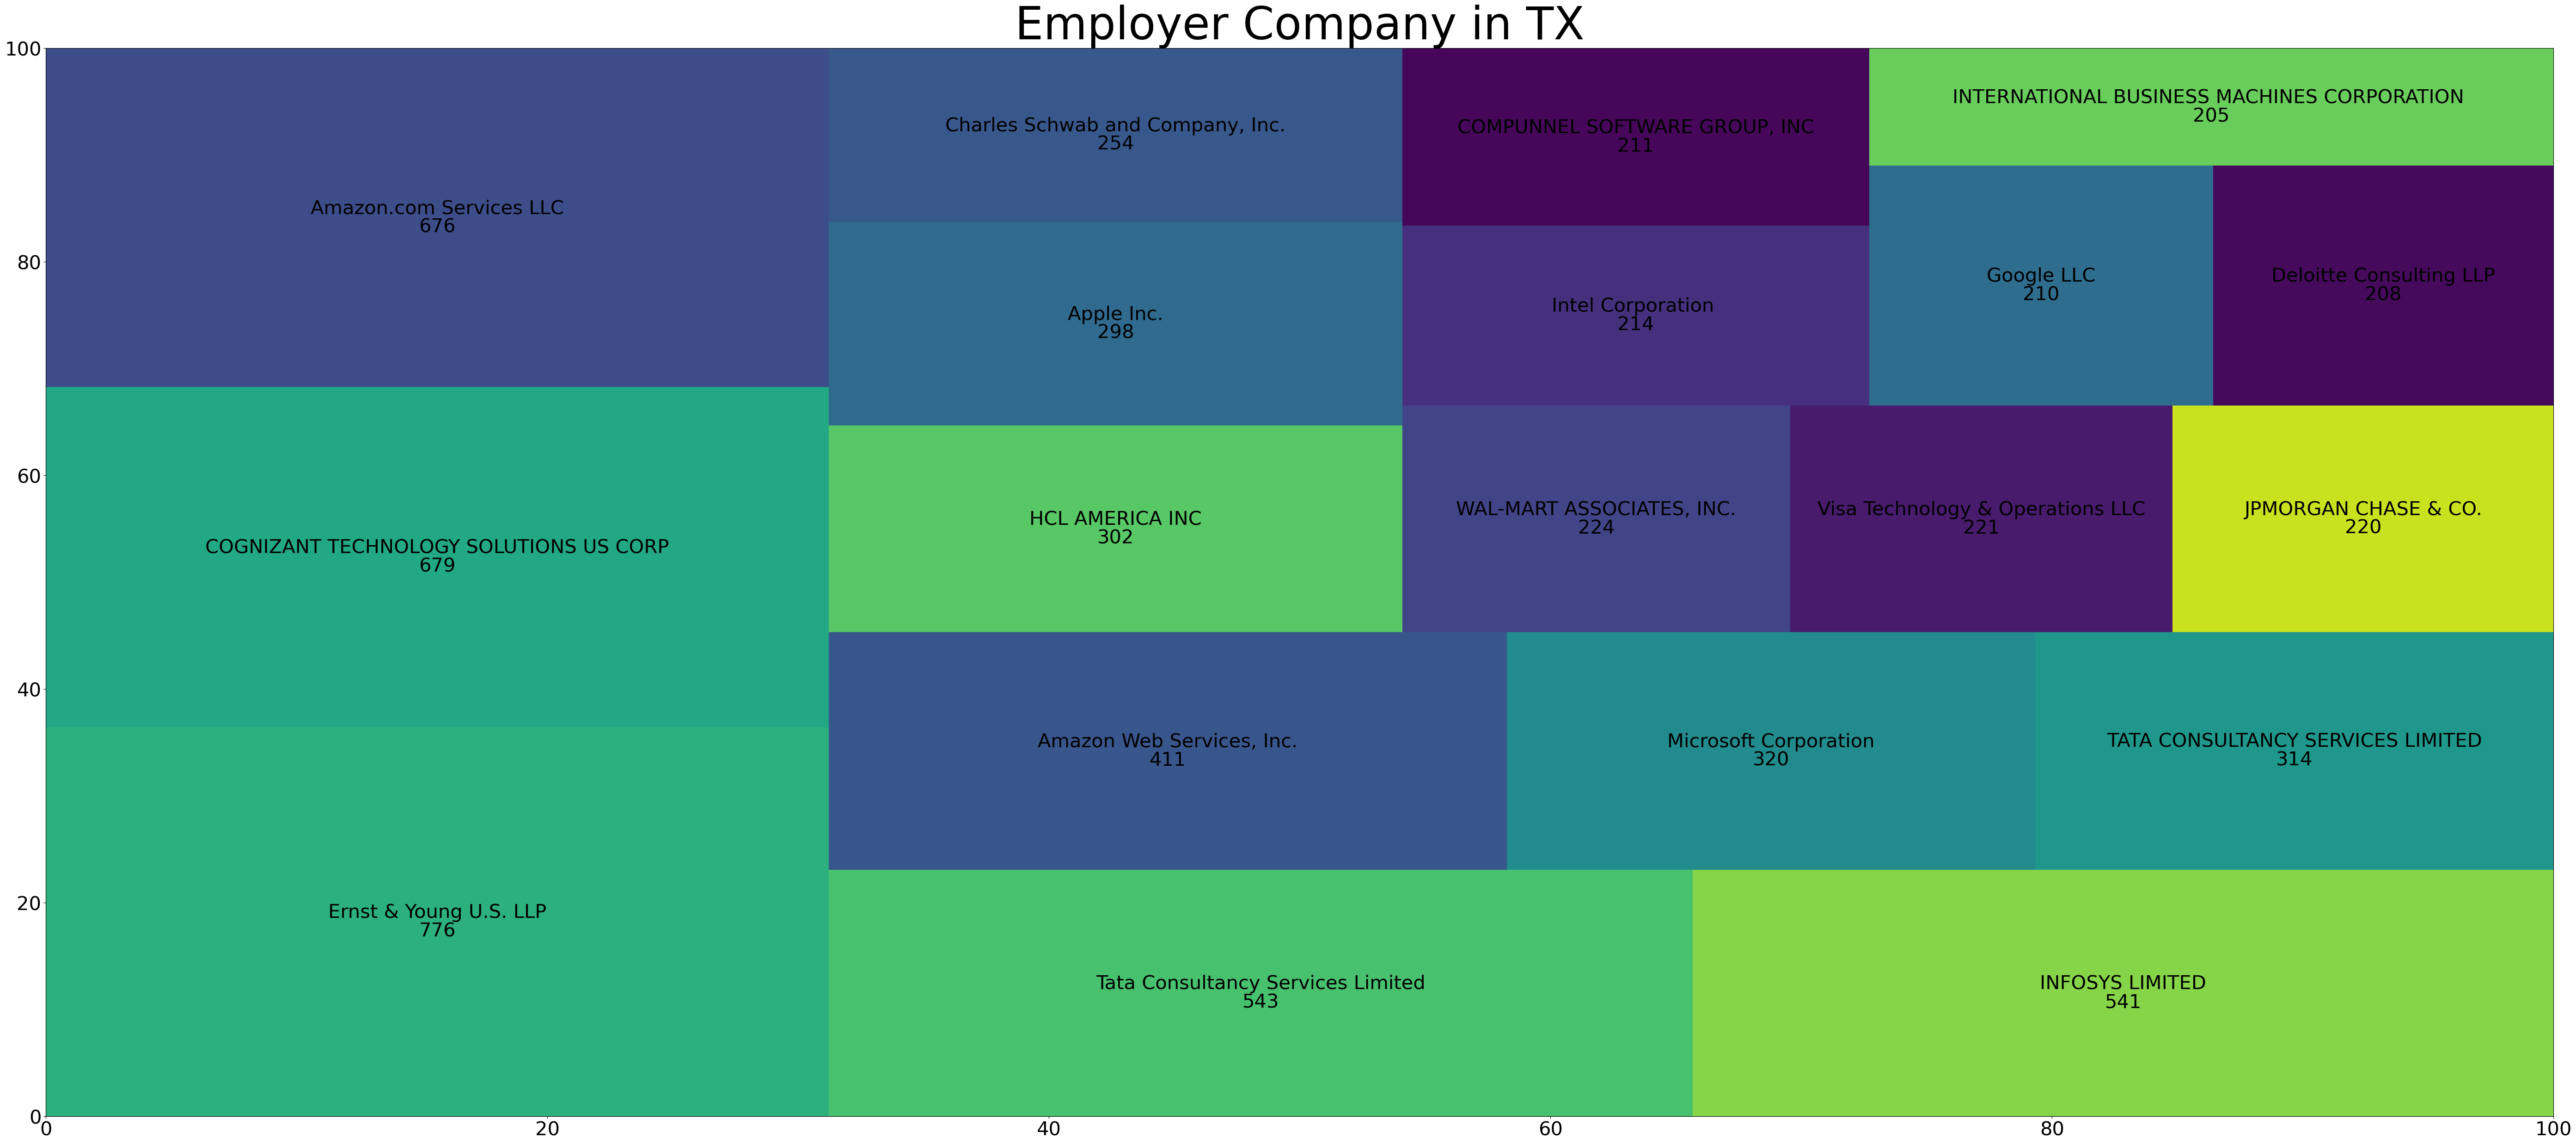

In [130]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (70, 30)
plt.rcParams['font.size'] = 30
plt.rcParams['font.stretch'] = 'extra-expanded'
plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.ylim(100, 20000)
squarify.plot(sizes=df_tx1['EMPLOYER_NAME'], label = df_tx1.index, value = df_tx1['EMPLOYER_NAME'])
plt.title("Employer Company in TX", fontsize = 70)


In [86]:
pd.DataFrame(df_tx['EMPLOYER_NAME'].value_counts())

,EMPLOYER_NAME
Ernst & Young U.S. LLP,776
COGNIZANT TECHNOLOGY SOLUTIONS US CORP,679
Amazon.com Services LLC,676
Tata Consultancy Services Limited,543
INFOSYS LIMITED,541
...,...
ENSCO Rail Inc.,1
"Steer Davies & Gleave, Inc.",1
Global Payment Holding Company,1
Sunray Infosys Incorporation,1


plot data

In [78]:
df_plot = df_tx

In [79]:
df_plot.describe(include="all")

,WORKSITE_STATE,PREVAILING_WAGE,WAGE_UNIT_OF_PAY,VISA_CLASS,SOC_TITLE,EMPLOYER_NAME
count,31876,31876.000000,31876,31876,31876,31876
unique,1,NaN,1,4,354,6578
top,TX,NaN,Year,H-1B,"Software Developers, Applications",Ernst & Young U.S. LLP
freq,31876,NaN,31876,31355,11907,776
mean,NaN,96399.369472,NaN,NaN,NaN,NaN
std,NaN,25411.797033,NaN,NaN,NaN,NaN
min,NaN,7836.380000,NaN,NaN,NaN,NaN
25%,NaN,77022.000000,NaN,NaN,NaN,NaN
50%,NaN,94037.000000,NaN,NaN,NaN,NaN
75%,NaN,111176.000000,NaN,NaN,NaN,NaN


In [275]:
df_plot.describe()

,PREVAILING_WAGE
count,6243.000000
mean,162085.431004
std,36213.530550
min,7831.180000
25%,136718.000000
50%,156957.000000
75%,183914.000000
max,276328.000000


<AxesSubplot:xlabel='PREVAILING_WAGE', ylabel='Count'>

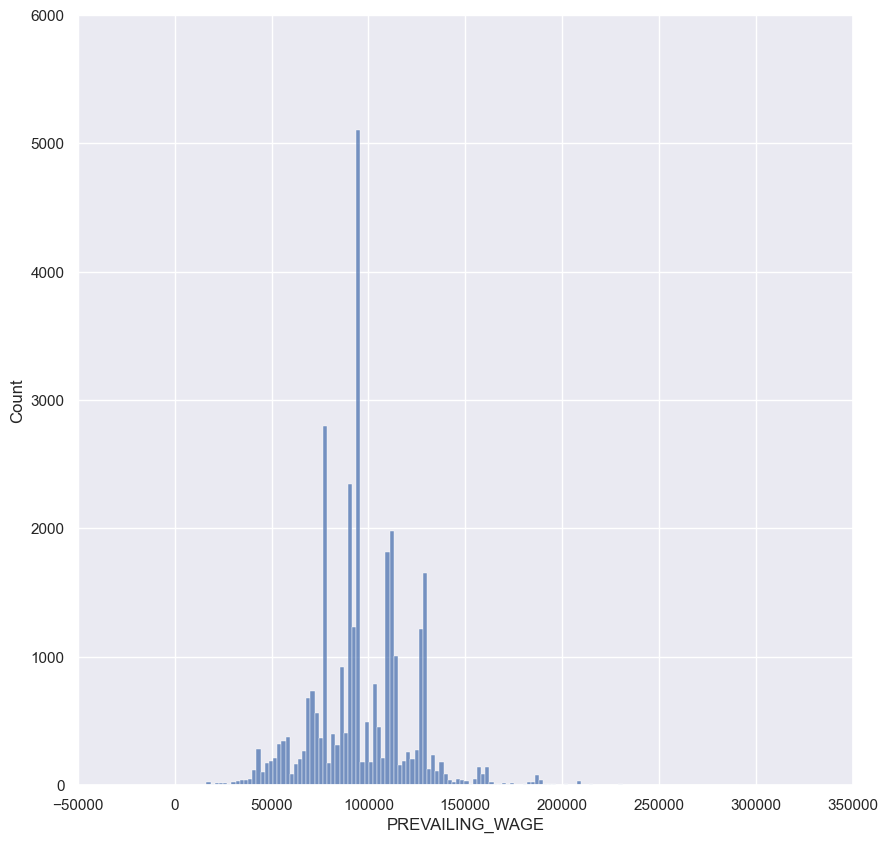

In [139]:
sns.set(rc={'figure.figsize':(10,10)}, font_scale = 1)
sns.histplot(data=df_plot, x ='PREVAILING_WAGE')


<AxesSubplot:xlabel='Count', ylabel='WORKSITE_STATE'>

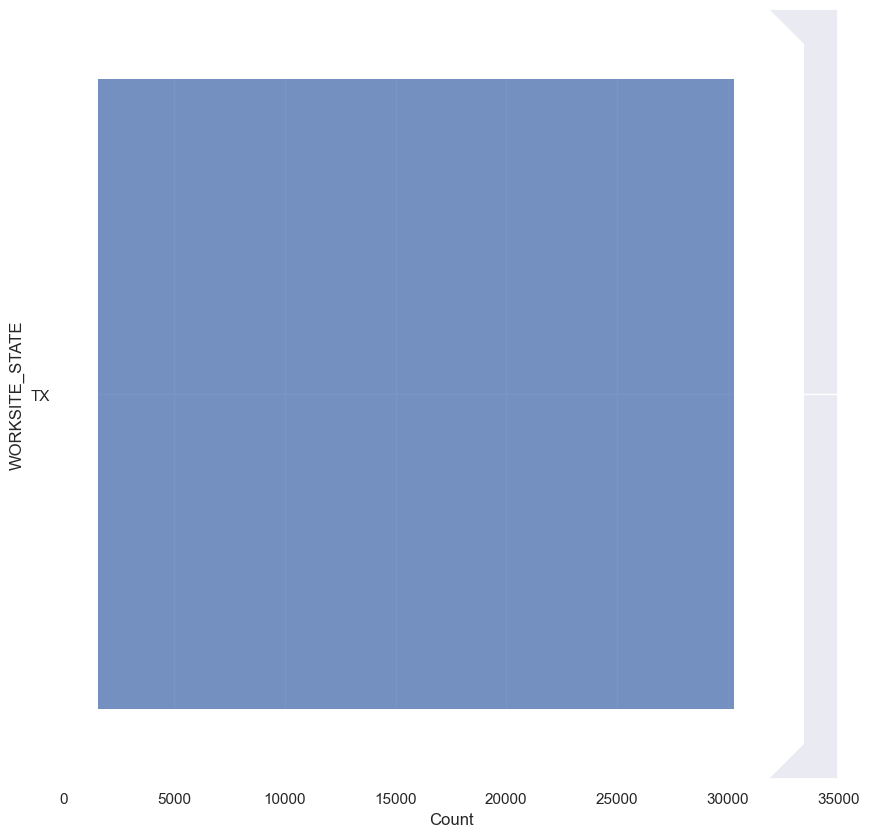

In [136]:
sns.set(rc={'figure.figsize':(10,10)}, font_scale = 1)
sns.histplot(data=df_plot, y= "WORKSITE_STATE")

In [8]:
df_plot = df_main

In [9]:
frequency = df_plot["VISA_CLASS"].value_counts()
df_plot_pie = pd.DataFrame(frequency)

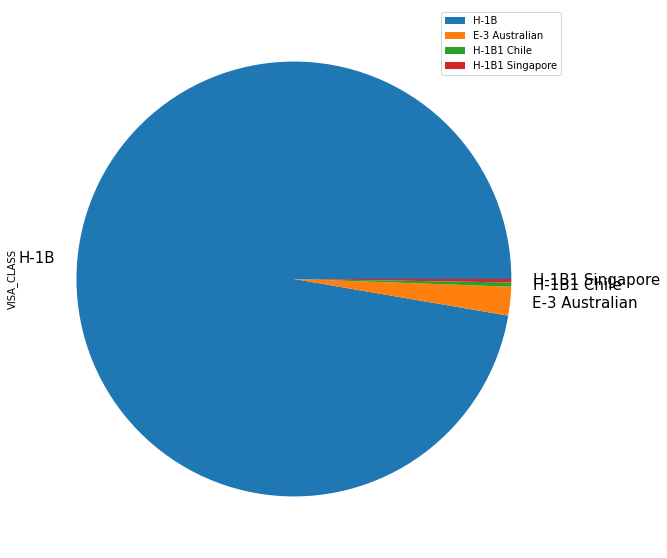

In [16]:
plot = df_plot_pie.plot.pie(y='VISA_CLASS', figsize=(10, 10), fontsize = 15, legend = 1)

In [38]:
sns.set(rc={'figure.figsize':(80,70)}, font_scale = 7)
sns.histplot(data=df_plot, y= "SOC_TITLE")

ValueError: Could not interpret value `SOC_TITLE` for parameter `y`

In [39]:
sns.set(rc={'figure.figsize':(20,10)}, font_scale = 1.5)
sns.histplot(data=df_plot, x = "SOC_TITLE")

ValueError: Could not interpret value `SOC_TITLE` for parameter `x`

In [113]:
string = "Hey! What's up?"
string = re.sub("\!|\'|\?","",string)
print(string)


Hey Whats up


In [21]:
wage = ['PREVAILING_WAGE', 'PW_UNIT_OF_PAY' , 'PW_TRACKING_NUMBER', 'PW_WAGE_LEVEL', 'PW_OES_YEAR', 'PW_OTHER_SOURCE', 'PW_OTHER_YEAR',
'PW_SURVEY_PUBLISHER', 'PW_SURVEY_NAME']


num = ['TOTAL_WORKER_POSITIONS' ,'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT',
       'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'NAICS_CODE', 'WORKSITE_WORKERS', 'PW_OTHER_YEAR', 'TOTAL_WORKSITE_LOCATIONS']

In [58]:
num = ['NAICS_CODE', 'REQUIRED_TRAINING_MONTHS', 'REQUIRED_EXPERIENCE_MONTHS', 'ALT_TRAINING_MONTHS', 'ALT_EXPERIENCE_MONTHS'
      , 'ALT_PWD_WAGE_RATE']

In [285]:
num = ['EMPLOYER_NUM_EMPLOYEES', 'EMPLOYER_YEAR_COMMENCED_BUSINESS', 'REQUIRED_TRAINING_MONTHS', 'REQUIRED_EXPERIENCE_MONTHS', 
      'ACCEPT_ALT_COMBO_EDUCATION_YRS', 'ACCEPT_ALT_OCCUPATION_MONTHS', 'FOREIGN_WORKER_YRS_ED_COMP', "PREVAILING_WAGE"]

In [292]:
df_main.describe()

,PREVAILING_WAGE
count,249345.000000
mean,102271.253935
std,33182.971215
min,709.200000
25%,78915.000000
50%,97760.000000
75%,121451.000000
max,306530.000000


In [291]:

corr = df_main[num].corr(method = 'pearson') #피어슨 상관계수를 구하는 것

fig = plt.figure(figsize = (16, 12)) #시각화
ax = fig.gca()

sns.set(font_scale=1.5) # seaborn library font 설정
hm = sns.heatmap(corr.values,#heatmap 사용
                 annot=True, 
                 fmt='.2f', #소수점 2번째 자리
                 annot_kws={'size': 15},
                 yticklabels=num,
                 xticklabels=num,
                 ax=ax)
plt.tight_layout() #창에 딱 맞게 설정
plt.show()

KeyError: "['REQUIRED_TRAINING_MONTHS', 'REQUIRED_EXPERIENCE_MONTHS', 'ACCEPT_ALT_COMBO_EDUCATION_YRS', 'EMPLOYER_YEAR_COMMENCED_BUSINESS', 'ACCEPT_ALT_OCCUPATION_MONTHS', 'EMPLOYER_NUM_EMPLOYEES', 'FOREIGN_WORKER_YRS_ED_COMP'] not in index"

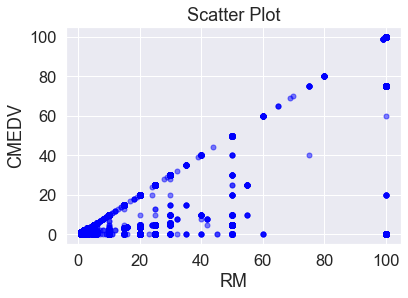

In [14]:
plt.plot('TOTAL_WORKER_POSITIONS', 'NEW_EMPLOYMENT', 
         data=df,
         linestyle='none', 
         marker='o', 
         markersize=5,
         color='blue', 
         alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('RM')
plt.ylabel('CMEDV')
plt.show()